In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [16]:
ds = xr.open_dataset("../data/Paper_ds/final_UNR_GAT_2023.nc")[['detrend_input_n', 'detrend_input_e','detrend_input_z', 'final_input_n', 'final_input_e','final_input_z']]
ds

<xarray.Dataset>
Dimensions:          (station: 1084, time: 5112)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2023-12-30
  * station          (station) object '34A1' '34A2' '34A3' ... 'ZOLE' 'ZSE1'
    latitude         (station) float64 ...
    longitude        (station) float64 ...
Data variables:
    detrend_input_n  (station, time) float32 ...
    detrend_input_e  (station, time) float32 ...
    detrend_input_z  (station, time) float32 ...
    final_input_n    (station, time) float32 ...
    final_input_e    (station, time) float32 ...
    final_input_z    (station, time) float32 ...
Attributes:
    dataset source:   UNR from UNR
    data processing:  raw data are detrended for each channel (detrend_input*...

In [18]:
ds_fit = xr.open_dataset("../fit_daily_UNR.nc").sel(time=slice(ds.time.data[0], ds.time.data[-1]))
ds_fit

<xarray.Dataset>
Dimensions:  (station: 1101, time: 5112)
Coordinates:
  * station  (station) object '34A1' '34A2' '34A3' ... 'YONC' 'ZOLE' 'ZSE1'
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2023-12-30
Data variables:
    n        (station, time) float64 ...
    e        (station, time) float64 ...
    z        (station, time) float64 ...

In [19]:
%%time
for c in ['e', 'n', 'z']:
    ds[f'detrend_pred_{c}'] = ds[f'detrend_input_{c}'].mean(dim='station').broadcast_like(ds[f'detrend_input_{c}'])
    ds[f'detrend_denoised_{c}'] = ds[f'detrend_input_{c}'] - ds[f'detrend_pred_{c}']
    ds[f'final_denoised_{c}'] = ds[f'detrend_denoised_{c}'] + ds_fit[c]
    ds[f'final_pred_{c}'] = ds[f'detrend_pred_{c}'] + ds_fit[c]
ds

CPU times: user 535 ms, sys: 266 ms, total: 801 ms
Wall time: 1.49 s


<xarray.Dataset>
Dimensions:             (station: 1084, time: 5112)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-01 ... 2023-12-30
  * station             (station) object '34A1' '34A2' '34A3' ... 'ZOLE' 'ZSE1'
    latitude            (station) float64 ...
    longitude           (station) float64 ...
Data variables: (12/18)
    detrend_input_n     (station, time) float32 nan nan ... 0.00112 0.0001685
    detrend_input_e     (station, time) float32 nan nan ... -0.0005723 0.0009794
    detrend_input_z     (station, time) float32 nan nan ... 0.005486 -0.0007005
    final_input_n       (station, time) float32 ...
    final_input_e       (station, time) float32 ...
    final_input_z       (station, time) float32 ...
    ...                  ...
    final_denoised_n    (station, time) float64 nan nan nan ... 0.01116 0.01065
    final_pred_n        (station, time) float64 0.3523 0.3536 ... 0.01097
    detrend_pred_z      (station, time) float32 0.000232 0.001479 ... -0.002049
    detrend_denoised_z  (station, time) float32 nan nan ... 0.005394 0.001348
    final_denoised_z    (station, time) float64 nan nan nan ... 0.6381 0.6341
    final_pred_z        (station, time) float64 0.7093 0.7105 ... 0.6328 0.6307
Attributes:
    dataset source:   UNR from UNR
    data processing:  raw data are detrended for each channel (detrend_input*...

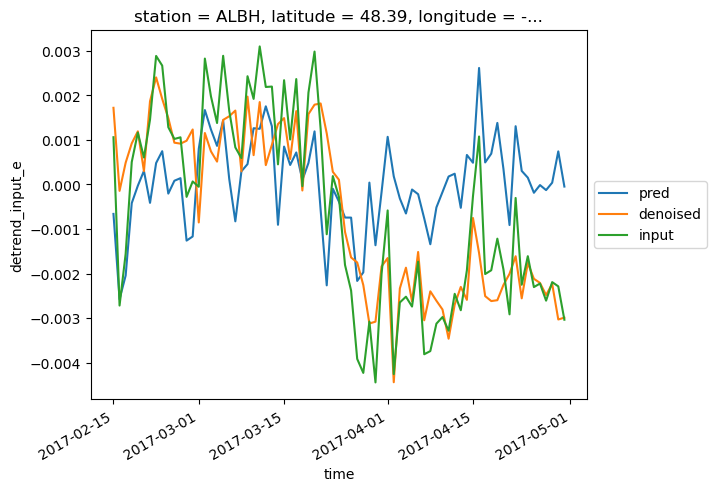

In [20]:
ds.detrend_pred_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="pred")
ds.detrend_denoised_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="denoised")
ds.detrend_input_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="input")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

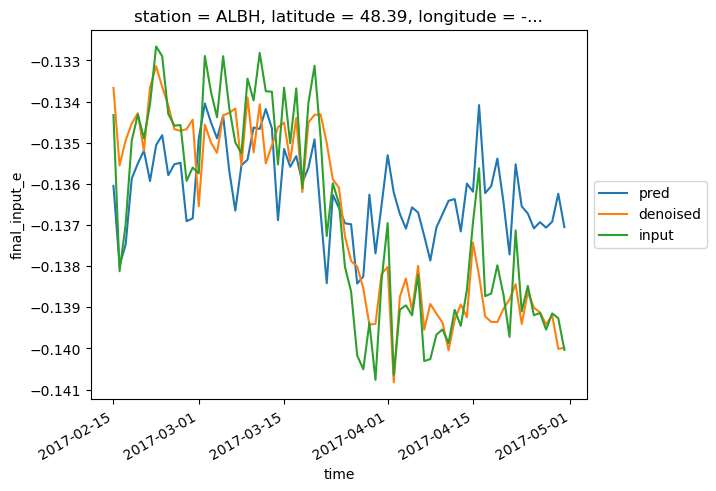

In [21]:
ds.final_pred_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="pred")
ds.final_denoised_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="denoised")
ds.final_input_e.sel(station='ALBH').sel(time=slice('2017-02-15', '2017-04-30')).plot(label="input")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

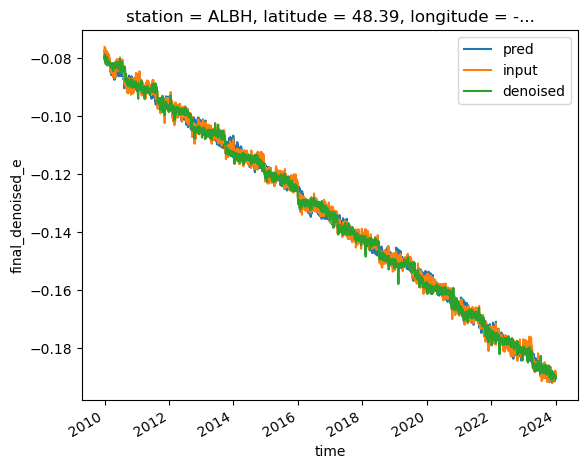

In [22]:
ds.final_pred_e.sel(station='ALBH').plot(label="pred")
ds.final_input_e.sel(station='ALBH').plot(label="input")
ds.final_denoised_e.sel(station='ALBH').plot(label="denoised")
plt.legend()

In [23]:
ds

<xarray.Dataset>
Dimensions:             (station: 1084, time: 5112)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-01 ... 2023-12-30
  * station             (station) object '34A1' '34A2' '34A3' ... 'ZOLE' 'ZSE1'
    latitude            (station) float64 ...
    longitude           (station) float64 ...
Data variables: (12/18)
    detrend_input_n     (station, time) float32 nan nan ... 0.00112 0.0001685
    detrend_input_e     (station, time) float32 nan nan ... -0.0005723 0.0009794
    detrend_input_z     (station, time) float32 nan nan ... 0.005486 -0.0007005
    final_input_n       (station, time) float32 ...
    final_input_e       (station, time) float32 ...
    final_input_z       (station, time) float32 ...
    ...                  ...
    final_denoised_n    (station, time) float64 nan nan nan ... 0.01116 0.01065
    final_pred_n        (station, time) float64 0.3523 0.3536 ... 0.01097
    detrend_pred_z      (station, time) float32 0.000232 0.001479 ... -0.002049
    detrend_denoised_z  (station, time) float32 nan nan ... 0.005394 0.001348
    final_denoised_z    (station, time) float64 nan nan nan ... 0.6381 0.6341
    final_pred_z        (station, time) float64 0.7093 0.7105 ... 0.6328 0.6307
Attributes:
    dataset source:   UNR from UNR
    data processing:  raw data are detrended for each channel (detrend_input*...

In [24]:
ds.to_netcdf("../data/Paper_ds/avg_position_denoising_wdowinski_UNR.nc")